In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


Training data shape: (60000, 28, 28)


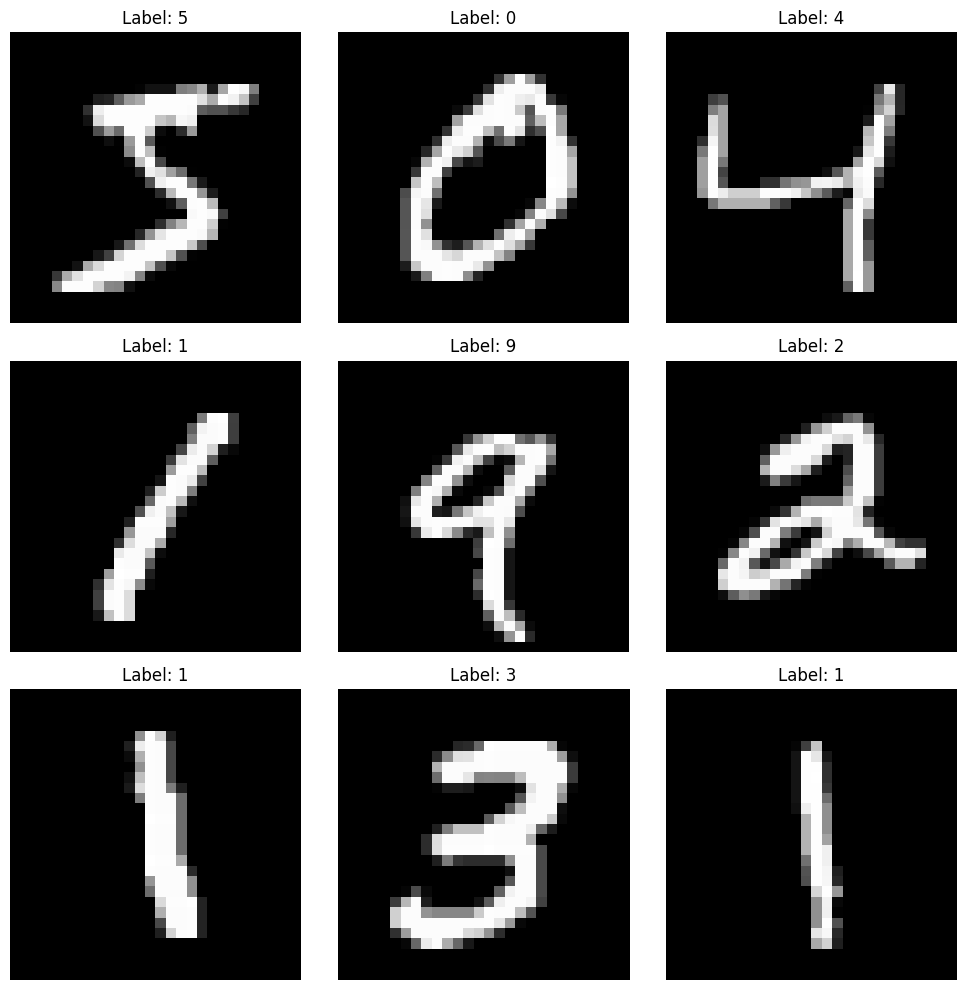

In [ ]:
print("Training data shape:", x_train.shape)  # (60000, 28, 28)

# Show the first 9 digits
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Reshape from (60000, 28, 28) to (60000, 784)
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Optional: confirm the shape
print("Flattened training data shape:", x_train_flat.shape)
print("Flattened test data shape:", x_test_flat.shape)


Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [ ]:
# Normalise
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

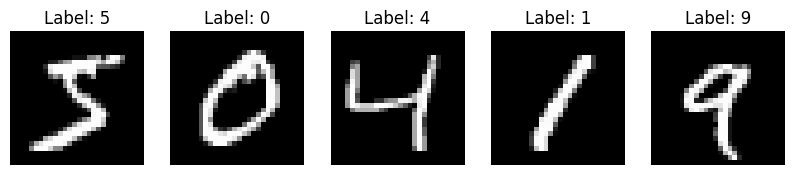

In [ ]:
# Plot 5 images from x_train
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

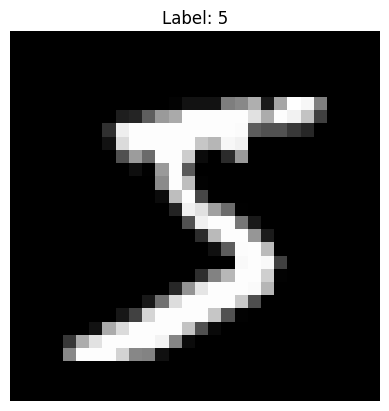

In [ ]:
img = x_train_flat[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

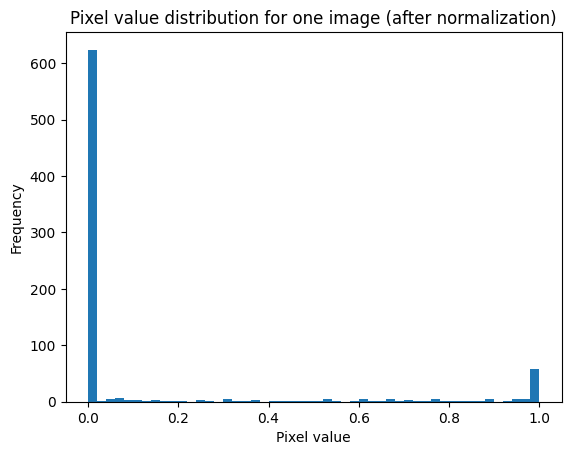

In [ ]:
plt.hist(x_train_flat[0], bins=50)
plt.title("Pixel value distribution for one image (after normalization)")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Check one-hot vector for a sample
print("One-hot vector for y_train[0]:", y_train_cat[0])

One-hot vector for y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


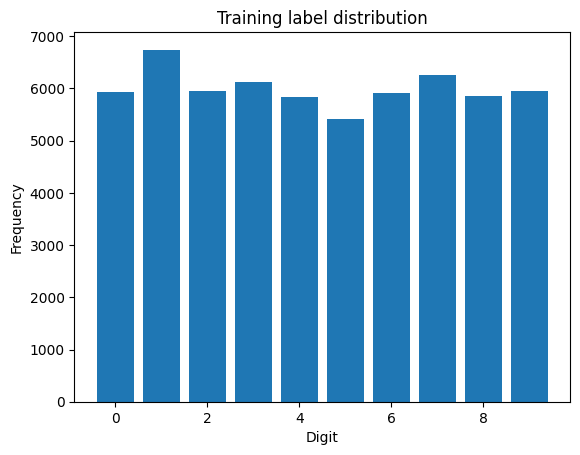

In [ ]:
import numpy as np
# Count original labels
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Training label distribution")
plt.show()

In [ ]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.001)),
    Dense(32, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10,
                    batch_size=64,
                    callbacks=[early_stop])


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4739 - loss: 1.9916 - val_accuracy: 0.8792 - val_loss: 0.7862
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8844 - loss: 0.7583 - val_accuracy: 0.9056 - val_loss: 0.6723
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9103 - loss: 0.6596 - val_accuracy: 0.9220 - val_loss: 0.6073
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9231 - loss: 0.6015 - val_accuracy: 0.9307 - val_loss: 0.5735
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9314 - loss: 0.5675 - val_accuracy: 0.9386 - val_loss: 0.5382
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9367 - loss: 0.5363 - val_accuracy: 0.9423 - val_loss: 0.5106
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9457 - loss: 0.5025 - val_accuracy: 0.9450 - val_loss: 0.4943
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9479 - loss: 0.4882 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9499 - loss: 0.4584
Test accuracy: 0.9567000269889832


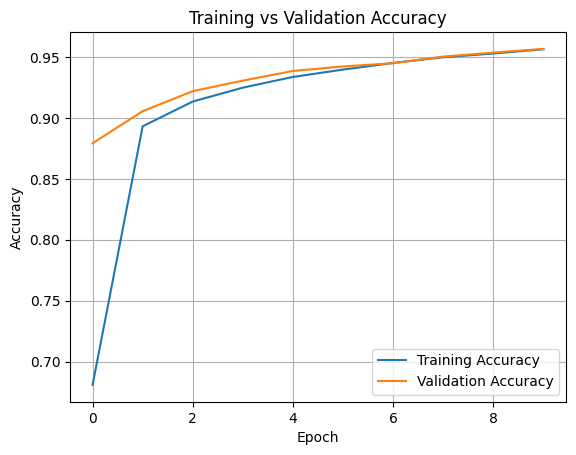

In [ ]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10,
                    batch_size=64,
                    callbacks =(early_stop))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8749 - loss: 0.7394 - val_accuracy: 0.9371 - val_loss: 0.4219
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9293 - loss: 0.4480 - val_accuracy: 0.9325 - val_loss: 0.4195
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9274 - loss: 0.4314 - val_accuracy: 0.9363 - val_loss: 0.3924
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9284 - loss: 0.4235 - val_accuracy: 0.9288 - val_loss: 0.4160
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9331 - loss: 0.4048 - val_accuracy: 0.9180 - val_loss: 0.4408
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9298 - loss: 0.4062 - val_accuracy: 0.9220 - val_loss: 0.4499


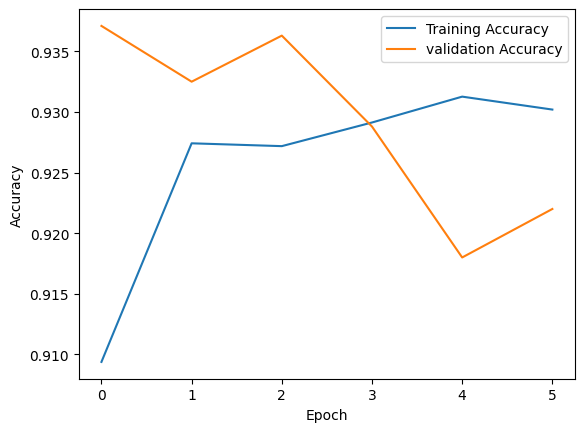

In [ ]:
#plot training bs validation accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_tanh = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='tanh', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    Dense(64, activation='tanh', kernel_regularizer= regularizers.l2(0.001)),
    Dense(32, activation='tanh',kernel_regularizer= regularizers.l2(0.001)),
    Dense(10, activation='softmax')
])

In [ ]:
model_tanh.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#define early stop
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_tanh.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10,
                    batch_size=64,
                    callbacks =(early_stop)     )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6595 - loss: 1.5693 - val_accuracy: 0.8815 - val_loss: 0.8339
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8860 - loss: 0.7997 - val_accuracy: 0.9035 - val_loss: 0.7046
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9027 - loss: 0.7008 - val_accuracy: 0.9133 - val_loss: 0.6492
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9144 - loss: 0.6462 - val_accuracy: 0.9205 - val_loss: 0.6113
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9211 - loss: 0.6064 - val_accuracy: 0.9263 - val_loss: 0.5802
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9256 - loss: 0.5811 - val_accuracy: 0.9296 - val_loss: 0.5554
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9332 - loss: 0.5510 - val_accuracy: 0.9345 - val_loss: 0.5330
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9353 - loss: 0.5315 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model_tanh.evaluate(x_test, y_test_cat)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9345 - loss: 0.5098
Test accuracy: 0.9435999989509583


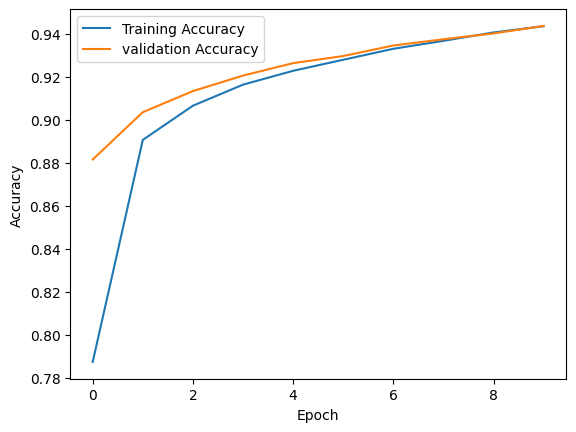

In [ ]:
#plot training bs validation accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_tanh.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#define early stop
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_tanh.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10,
                    batch_size=64,
                    callbacks =(early_stop)     )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8747 - loss: 0.7408 - val_accuracy: 0.8926 - val_loss: 0.6574
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9024 - loss: 0.6439 - val_accuracy: 0.8836 - val_loss: 0.7028
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9067 - loss: 0.6335 - val_accuracy: 0.9127 - val_loss: 0.6248
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9074 - loss: 0.6329 - val_accuracy: 0.9044 - val_loss: 0.6638
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9073 - loss: 0.6451 - val_accuracy: 0.9157 - val_loss: 0.6107
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9096 - loss: 0.6248 - val_accuracy: 0.9056 - val_loss: 0.6308
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9118 - loss: 0.6107 - val_accuracy: 0.9128 - val_loss: 0.5879
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9112 - loss: 0.6073 - val_accuracy: 0

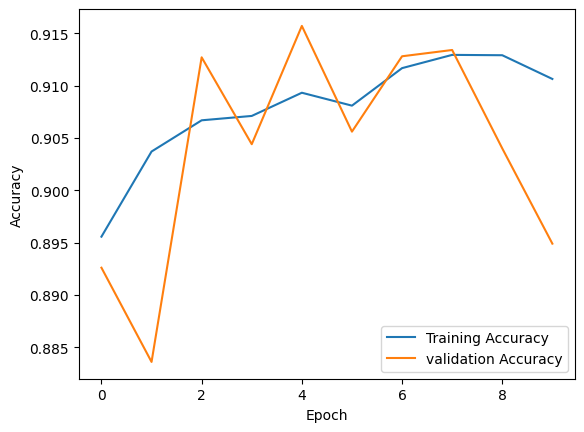

In [ ]:
#plot training bs validation accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Sigmoid
model_sigmoid = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    Dense(10, activation='softmax')
])

In [ ]:
model_sigmoid.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#define early stop
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_sigmoid.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10,
                    batch_size=64,
                    callbacks =(early_stop)     )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1109 - loss: 2.6910 - val_accuracy: 0.1135 - val_loss: 2.6285
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1202 - loss: 2.6240 - val_accuracy: 0.1135 - val_loss: 2.6087
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1360 - loss: 2.6049 - val_accuracy: 0.1136 - val_loss: 2.5889
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1434 - loss: 2.5849 - val_accuracy: 0.1195 - val_loss: 2.5669
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1866 - loss: 2.5611 - val_accuracy: 0.3994 - val_loss: 2.5405
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3344 - loss: 2.5338 - val_accuracy: 0.3207 - val_loss: 2.5038
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3682 - loss: 2.4922 - val_accuracy: 0.4787 - val_loss: 2.4434
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4232 - loss: 2.4238 - val_accuracy:

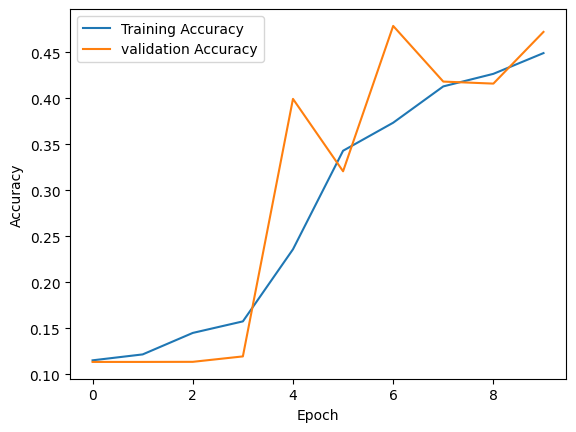

In [ ]:
#plot training bs validation accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_sigmoid.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#define early stop
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_sigmoid.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10,
                    batch_size=64,
                    callbacks =(early_stop)     )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7662 - loss: 1.0791 - val_accuracy: 0.8858 - val_loss: 0.7322
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8905 - loss: 0.7084 - val_accuracy: 0.9128 - val_loss: 0.6169
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8974 - loss: 0.6651 - val_accuracy: 0.9167 - val_loss: 0.5670
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9040 - loss: 0.6216 - val_accuracy: 0.9168 - val_loss: 0.5578
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9121 - loss: 0.5867 - val_accuracy: 0.9098 - val_loss: 0.5774
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9149 - loss: 0.5673 - val_accuracy: 0.9313 - val_loss: 0.5027
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9204 - loss: 0.5443 - val_accuracy: 0.9309 - val_loss: 0.5029
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9180 - loss: 0.5509 - val_accuracy: 

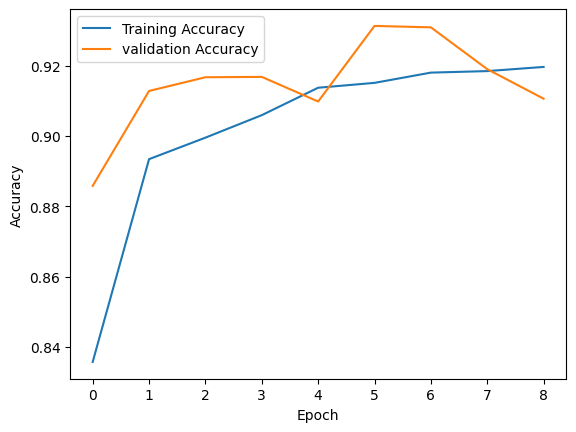

In [ ]:
#plot training bs validation accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()